In [1]:
!pip install scikit-plot

###**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import scikitplot as skplt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

###**Import your dataset**

In [3]:
#reading the .xlsx dataset in to the dataframe
df = pd.read_excel("AIDA-Dataset.xlsx")

###**Data preprossesing**

In [4]:
short_names_mapping = {
    'Do you want to participate in this survey?': 'Participation',
    'Please state your age? (e.g. 25)': 'Age',
    'What is your gender?': 'Gender',
    'What degree are you currently pursuing?': 'Degree',
    'What is your current academic year? (e.g. 2)': 'AcademicYear',
    'Which medium of school have you come from?': 'SchoolMedium',
    'Which department do you study in?': 'Department',
    'What is your current cumulative grade points average (CGPA)?': 'CGPA',
    'Do you have any personal history of depression?': 'DepressionHistory',
    'What is your current relationship status?': 'RelationshipStatus',
    'What is your religion?': 'Religion',
    'What is your current place of residence?': 'Residence',
    'Currently I live - ': 'CurrentLocation',
    'Number of siblings (e.g. 2)': 'SiblingsCount',
    'What is your ordinal position/birth order among your siblings? (e.g. 1)': 'SiblingOrder',
    ' [I feel that I have additional responsibility to be in this position.]': 'ResponsibilityFeeling',
    'What is your father’s occupation? (If you do not see the occupation listed below or in case of a deceased father please choose the "other" option.)': 'FatherOccupation',
    'What is your mother’s occupation? (If you do not see the occupation listed below or in case of a deceased mother please choose the "other" option.)': 'MotherOccupation',
    'What is your family’s (household) average monthly income? (e.g. 2000)': 'FamilyIncome',
    'Do you have any financial hardship currently?': 'FinancialHardship',
    'Is your family financially dependent on you?': 'FinancialDependency',
    'Do you have anyone in your family who has been suffering from fatal diseases?': 'FamilyIllness',
    ' [How often do you communicate with your parents?]': 'ParentalCommunicationFrequency',
    'Give your opinion about these: [My parents are very strict about my daily life style]': 'ParentalStrictness',
    'Give your opinion about these: [My parents give pressure for my academic subject selection]': 'ParentalAcademicPressure',
    'Give your opinion about these: [My parents give pressure for my marriage.]': 'ParentalMarriagePressure',
    'Give your opinion about these: [My parents give pressure for my career choice.]': 'ParentalCareerPressure',
    'Give your opinion about these: [My parents give pressure regarding my decision on studying abroad]': 'ParentalStudyAbroadPressure',
    'Give your opinion about these statements [I have bad understanding with my parents]': 'ParentalUnderstanding',
    'Give your opinion about these statements [I have bad bonding with my siblings]': 'SiblingBonding',
    'Give your opinion about these statements [My  parents have unstable relationship]': 'ParentalRelationshipStability',
    'Give your opinion about these statements [I don’t get along with most of my classmates/friends]': 'PeerRelationship',
    'Give your opinion about these statements [My university teachers are unsupportive]': 'TeacherSupport',
    'Give your opinion about these statements [An unstable relationship with my partner affects my life.]': 'PartnerRelationshipImpact',
    'Give your opinion about these statements [A discouraging working environment (colleague/boss) affects the output of my work.]': 'WorkEnvironmentImpact',
    ' [I feel society interferes with my freedom of expression (freedom of speech / movement / etc...)]': 'SocietalInterference',
    'Have you ever experienced this sort of violence before? [I have faced Physical Violence before. (someone uses his/her body part or an object to control my actions) (শারিরিকনির্যাতন)]': 'PhysicalViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Sexual Violence before. (i am/was forced to unwillingly take part in sexual activity) (যৌনসহিংসতা)]': 'SexualViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Verbal Violence before. (someone uses language, whether spoken or written as an abusing tool against me) (মৌখিকগালি)]': 'VerbalViolenceExperience',
    'Have you ever experienced this sort of violence before? [I have faced Emotional Violence before. (someone says or does something to make me feel stupid or worthless) (মানসিকহিংসা)]': 'EmotionalViolenceExperience',
    'What kind of institution do you study in?': 'InstitutionType',
    'Self-perception on Academic status: [My academic performance is very poor.]': 'PoorAcademicPerformanceSelfPerception',
    'Self-perception on Academic status: [I have been criticized for my academic result.]': 'AcademicCriticismSelfPerception',
    'Self-perception on Academic status: [I am unsatisfied with my academic workload (i.e., presentations, assignments, tutorials)]': 'UnsatisfiedAcademicWorkloadSelfPerception',
    'Give your opinion for these: [I am not studying in my subject of interest.]': 'NonInterestSubjectOpinion',
    'Give your opinion for these: [I am unhappy with the subject that I am studying.]': 'UnhappySubjectOpinion',
    'Give your opinion for these: [I am not studying in the institution of my interest.]': 'NonInterestInstitutionOpinion',
    'Give your opinion for these: [I am unhappy with the institution that I am studying.]': 'UnhappyInstitutionOpinion',
    'Did you select the subject due to career prospects only?': 'CareerProspectsSubjectSelection',
    'What is your current employment status?': 'EmploymentStatus',
    'Which of the following is true for you?': 'PersonalSituation',
    'How the pandemic is affecting your full time /part time job/tutoring?': 'PandemicImpactOnWork',
    'I am satisfied with my current job.': 'JobSatisfaction',
    'My family/partner is satisfied with my current job.': 'FamilyPartnerJobSatisfaction',
    ' [In my opinion, enough jobs are not available related to my pursued subject. (your academic subject )]': 'InsufficientJobsSubjectOpinion',
    'How many close friends (approximately) do you have? (e.g. 3)': 'CloseFriendsCount',
    ' [How often do you hang out with your friends?]': 'FriendHangoutFrequency',
    'Are you involved in any extracurricular activities?': 'ExtracurricularInvolvement',
    'How strongly do you agree with each of the following questions: [How often do you smoke?]': 'SmokingFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you take drugs?]': 'DrugUseFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you drink alcohol?]': 'AlcoholConsumptionFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you engage in physical exercise?]': 'PhysicalExerciseFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you practice religious activities?]': 'ReligiousActivitiesFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you play video games?]': 'VideoGamePlayingFrequencyPerception',
    'How strongly do you agree with each of the following questions: [How often do you play sports?]': 'SportsPlayingFrequencyPerception',
    'On average how many hours do you spend in social media? (e.g. 5)': 'SocialMediaUsageHours',
    'Give your opinion on these: [The success stories of my peers in social media sometimes pose negative impact on me]': 'PeerSuccessImpactOnSocialMediaOpinion',
    'Give your opinion on these: [Social media has negative influence on my purchase decision]': 'SocialMediaInfluenceOnPurchaseDecisionOpinion',
    "Give your opinion on these: [I find human bonding less trust-worthy because it's easy to become imposters on social media]": 'TrustInHumanBondingOnSocialMediaOpinion',
    'Give your opinion on these: [I feel numbness of feelings as I am constantly seeing variety of incidents on social media.]': 'NumbnessFeelingsDueToSocialMediaOpinion',
    'Give your opinion on these: [I like to interact with my friends in person rather than in virtual mode.]': 'PreferenceForInPersonInteractionOpinion',
    'Sad': 'Sadness',
    'Depressed mood (sadness, hopeless, helpless, worthless)': 'DepressedMood',
    'Future': 'FutureOutlook',
    'Failure': 'FearOfFailure',
    'Satisfaction': 'SatisfactionLevel',
    'Guilty ': 'FeelingsOfGuilt',
    'Feelings of guiltiness ': 'GuiltFeelings',
    'Punished': 'FeelingsOfPunishment',
    'Disappointment ': 'FeelingsOfDisappointment',
    'Blame on me': 'SelfBlame',
    'Cry ': 'TendencyToCry',
    'Irritated': 'Irritability',
    'Interest in other people': 'InterestInOthers',
    'Decisions': 'DecisionMaking',
    'Look': 'AppearanceConcern',
    'Self-Care (This question is pertaining to what you feeling right now)': 'SelfCarePerception',
    'Energy Level:': 'EnergyLevel',
    'Work and Activities': 'WorkAndActivitiesLevel',
    'Sleep ': 'SleepQuality',
    'Sleeping Too Much:': 'ExcessiveSleeping',
    'Tired': 'Fatigue',
    'Appetite': 'AppetiteLevel',
    'a)\tAccording to you:': 'SubjectiveHealthPerception',
    'b)\tAccording to weekly measurements:': 'ObjectiveHealthPerception',
    'Feelings of suicide': 'SuicidalFeelings',
    'Retardation (প্রতিবন্ধকতা) (slowness of thought and speech, impaired ability to concentrate, decreased motor activity)/ (চিন্তা , কথা , মনোযোগ , মস্তিষ্কের কর্মক্ষমতা হ্রাস)': 'CognitiveRetardation',
    'Agitation (feeling of irritability or severe restlessness) (উত্কণ্ঠা)': 'Agitation',
    'Anxiety Psychic (মানসিক দুশ্চিন্তা)': 'PsychicAnxiety',
    ' [I felt that I was rather touchy/oversensitive over the past week]': 'SensitivityPerception',
    ' [I was aware of the action of my heart in the absence of physical exertion (e.g. sense of heart rate increase, heart missing a beat)]': 'HeartAwarenessPerception',
    'ANXIETY SOMATIC (দৈহিক) (physiological concomitants of anxiety) such as\ngastro-intestinal – dry mouth, wind, indigestion (বদ হজম), diarrhea, cramps ( পেটে ব্যাথা), belching( বমি)\ncardio-vascular – palpitations ( বুক ধড়ফড়) , headaches\nrespiratory – hyperventilation ( জোরে জোরে শ্বাস নেয়া), sighing urinary frequency sweating': 'SomaticAnxietySymptoms',
    'Somatic Symptoms Gastro-Intestinal': 'GastrointestinalSymptoms',
    'General Somatic Symptoms': 'GeneralSomaticSymptoms',
    'Genital Symptoms (symptoms such as loss of libido, menstrual disturbances)': 'GenitalSymptoms',
    'Hypochondriasis (The belief and fear of serious illness) / ( মরণব্যাধি আছে এমন ভ্রান্ত ধারনা )': 'Hypochondriasis',
    'Insight (self-perception)': 'SelfPerception',
}
df.rename(columns=short_names_mapping, inplace=True)


###**Feature Engineering**

In [5]:
# demographic_feature=['Age',
#  'Gender',
#  'Degree',
#  'SchoolMedium',
#  'CGPA']

In [6]:
# df_demography = df[demographic_feature]
# df_demography.head()

In [7]:
QIDS_scale=['SleepQuality', 'ExcessiveSleeping', 'Sadness', 'AppetiteLevel', 'AppetiteLevel', 'ObjectiveHealthPerception', 'SubjectiveHealthPerception', 'DecisionMaking',
             'SelfBlame', 'SuicidalFeelings', 'InterestInOthers', 'EnergyLevel', 'CognitiveRetardation',
             'Agitation']

In [8]:
# Iterate through the list and print unique values for each feature
for feature in QIDS_scale:
    if feature in df.columns:  # Check if the feature is in your DataFrame
        print(f"Unique values for {feature}: {df[feature].unique()}")
    else:
        print(f"{feature} is not in the DataFrame")

Unique values for SleepQuality: ["I don't sleep as well as I used to." 'I can sleep as well as usual.'
 'I wake up 1-2 hours earlier than usual and find it hard to get back to sleep.'
 'I wake up several hours earlier than I used to and cannot get back to sleep.']
Unique values for ExcessiveSleeping: ['I sleep no longer than 7-8 hours/night, without napping during the day.'
 'I sleep no longer than 10 hours in a 24-hour period including naps.'
 'I sleep no longer than 12 hours in a 24-hour period including naps.'
 'I sleep longer than 12 hours in a 24-hour period including naps.']
Unique values for Sadness: ['I feel sad' 'I do not feel sad.'
 "I am sad all the time and I can't snap out of it."
 "I am so sad and unhappy that I can't stand it."]
Unique values for AppetiteLevel: ['My appetite is no worse than usual.'
 'My appetite is not as good as it used to be.'
 'My appetite is much worse now.' 'I have no appetite at all anymore.']
Unique values for AppetiteLevel: ['My appetite is no w

In [9]:
# Copying the original dataframe to a new one for encoding
df_scale = df.copy()

# Encoding SleepQuality
df_scale['SleepQuality'] = df['SleepQuality'].replace({
    "I can sleep as well as usual.": 0,
    "I don't sleep as well as I used to.": 1,
    "I wake up 1-2 hours earlier than usual and find it hard to get back to sleep.": 2,
    "I wake up several hours earlier than I used to and cannot get back to sleep.": 3
})

# Encoding ExcessiveSleeping
df_scale['ExcessiveSleeping'] = df['ExcessiveSleeping'].replace({
    "I sleep no longer than 7-8 hours/night, without napping during the day.": 0,
    "I sleep no longer than 10 hours in a 24-hour period including naps.": 1,
    "I sleep no longer than 12 hours in a 24-hour period including naps.": 2,
    "I sleep longer than 12 hours in a 24-hour period including naps.": 3
})

# Encoding Sadness
df_scale['Sadness'] = df['Sadness'].replace({
    "I do not feel sad.": 0,
    "I feel sad": 1,
    "I am sad all the time and I can't snap out of it.": 2,
    "I am so sad and unhappy that I can't stand it.": 3
})

# Since AppetiteLevel appears twice and seems identical, we'll just encode it once
df_scale['AppetiteLevel'] = df['AppetiteLevel'].replace({
    "My appetite is no worse than usual.": 0,
    "My appetite is not as good as it used to be.": 1,
    "My appetite is much worse now.": 2,
    "I have no appetite at all anymore.": 3
})

# Encoding ObjectiveHealthPerception
df_scale['ObjectiveHealthPerception'] = df['ObjectiveHealthPerception'].replace({
    "Less than half kg weight loss in week.": 0,
    "Greater than half kg weight loss in week.": 1,
    "Not assessed.": 2,  # Assuming "Not assessed" as a higher encoding due to the nature of its ambiguity
    "Greater than 1 kg weight loss weight in week.": 3
})

# Encoding SubjectiveHealthPerception
df_scale['SubjectiveHealthPerception'] = df['SubjectiveHealthPerception'].replace({
    "No weight loss.": 0,
    "Probable weight loss associated with present illness.": 1,
    "Definite (according 2 to patient) Weight loss": 2,
    "Not assessed": 3
})

# Encoding DecisionMaking
df_scale['DecisionMaking'] = df['DecisionMaking'].replace({
    "I make decisions about as well as I ever could.": 0,
    "I put off making decisions more than I used to.": 1,
    "I have greater difficulty in making decisions more than I used to.": 2,
    "I can't make decisions at all anymore.": 3
})

# Encoding SelfBlame
df_scale['SelfBlame'] = df['SelfBlame'].replace({
    "I don't feel I am any worse than anybody else.": 0,
    "I am critical of myself for my weaknesses or mistakes.": 1,
    "I blame myself for everything bad that happens.": 2,
    "I blame myself all the time for my faults.": 3
})

# Encoding SuicidalFeelings
df_scale['SuicidalFeelings'] = df['SuicidalFeelings'].replace({
    "Absent.": 0,
    "Feels life is not worth living.(জীবন নিরর্থক মনে হওয়া)": 1,
    "Wishes he/she were dead or any thoughts of possible death to self.(মৃত্যুর ইচ্ছা/চিন্তা)": 2,
    "Ideas or gestures of suicide.(আত্মহত্যার ধারনা পোষণ করা)": 3,
    "Attempts at suicide.(আত্মহত্যার চেষ্টা)": 3  # Assuming the same encoding for attempts and ideas/gestures
})

# Encoding InterestInOthers
df_scale['InterestInOthers'] = df['InterestInOthers'].replace({
    "I have not lost interest in other people.": 0,
    "I am less interested in other people than I used to be.": 1,
    "I have lost most of my interest in other people.": 2,
    "I have lost all of my interest in other people.": 3
})

# Encoding EnergyLevel
df_scale['EnergyLevel'] = df['EnergyLevel'].replace({
    "There is no change in my usual level of energy.": 0,
    "I get tired more easily than usual.": 1,
    "I have to make a big effort to start or finish my usual daily activities (for example, shopping, homework, cooking, or going to work).": 2,
    "I really cannot carry out most of my usual daily activities because I just don't have the energy.": 3
})

# Encoding CognitiveRetardation
df_scale['CognitiveRetardation'] = df['CognitiveRetardation'].replace({
    "Normal speech and thought.(সাধারন কথা বা চিন্তায় প্রতিবন্ধকতা )": 0,
    "Slight retardation during the interview.( interview চলাকালীন কিছু প্রতিবন্ধকতার সম্মুখীন হওয়া)": 1,
    "Obvious retardation during the interview.( interview চলাকালীন আবশ্যিক প্রতিবন্ধকতার সম্মুখীন হওয়া)": 2,
    "Interview difficult.( Interview  কঠিন মনে হওয়া )": 3,
    "Complete stupor.(বাক্রুদ্ধ হয়ে যাওয়া)": 3  # Assuming the same encoding for the last two for simplicity
})

#encoding for Agitation
df_scale['Agitation'] = df['Agitation'].replace({
    "None.": 0,
    "Fidgetiness/ (অস্থিরতা)": 1,
    "Moving about, can’t sit still.": 2,
    "Playing with hands, hair, etc.": 2,  # Assuming similar levels of agitation for some behaviors
    "Hand wringing/(হাত মোচড়ানো), nail biting, hair-pulling, biting of lips.": 3
})

df_scale.head()

,Participation,Age,Gender,Degree,AcademicYear,SchoolMedium,Department,CGPA,DepressionHistory,RelationshipStatus,...,Agitation,PsychicAnxiety,SensitivityPerception,HeartAwarenessPerception,SomaticAnxietySymptoms,GastrointestinalSymptoms,GeneralSomaticSymptoms,GenitalSymptoms,Hypochondriasis,SelfPerception
0,Yes,23,Female,Undergraduate,4,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.38,No,Single,...,1,Subjective(depending on patient/subject) tensi...,some of the time,not at all,Absent.,None.,None.,Absent.,Not present.,Denies being ill at all.
1,Yes,24,Female,Postgraduate,1,English Medium,Business & Economics Studies,3.08,Yes,Single,...,0,Worrying about minor matters. (ছোটখাট বিষয় নিয়...,not at all,not at all,Mild.,None.,None.,Absent.,Not present.,Denies being ill at all.
2,Yes,24,Male,Undergraduate,4,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.05,Yes,Prefer not to say,...,1,Subjective(depending on patient/subject) tensi...,some of the time,a good part of time,Absent.,None.,"Heaviness in limbs, back or head. Backaches, h...",Absent.,Not present.,Acknowledges being depressed and ill.
3,Yes,22,Male,Postgraduate,1,Bangla Medium,Mathematical/Engineering & Physical Sciences,3.82,Yes,Single,...,0,Worrying about minor matters. (ছোটখাট বিষয় নিয়...,a good part of time,some of the time,Mild.,None.,None.,Absent.,Not present.,Denies being ill at all.
4,Yes,25,Male,Undergraduate,4,Bangla Medium,Business & Economics Studies,3.40,Yes,Single,...,2,Subjective(depending on patient/subject) tensi...,some of the time,some of the time,Mild.,Loss of appetite but eating without staff enco...,"Heaviness in limbs, back or head. Backaches, h...",Severe.,Preoccupation (আচ্ছন্ন) with health,Acknowledges being depressed and ill.


In [10]:
df_scale = df_scale.loc[:, ['SleepQuality', 'ExcessiveSleeping', 'Sadness', 'AppetiteLevel', 'AppetiteLevel', 'ObjectiveHealthPerception', 'SubjectiveHealthPerception', 'DecisionMaking',
             'SelfBlame', 'SuicidalFeelings', 'InterestInOthers', 'EnergyLevel', 'CognitiveRetardation',
             'Agitation']]

In [11]:
df_scale.columns.tolist()

['SleepQuality',
 'ExcessiveSleeping',
 'Sadness',
 'AppetiteLevel',
 'AppetiteLevel',
 'ObjectiveHealthPerception',
 'SubjectiveHealthPerception',
 'DecisionMaking',
 'SelfBlame',
 'SuicidalFeelings',
 'InterestInOthers',
 'EnergyLevel',
 'CognitiveRetardation',
 'Agitation']

In [12]:
df_scale.head()

,SleepQuality,ExcessiveSleeping,Sadness,AppetiteLevel,AppetiteLevel,ObjectiveHealthPerception,SubjectiveHealthPerception,DecisionMaking,SelfBlame,SuicidalFeelings,InterestInOthers,EnergyLevel,CognitiveRetardation,Agitation
0,1,0,1,0,0,0,2,0,1,0,0,0,0,1
1,1,0,0,1,1,0,0,0,0,0,3,0,0,0
2,0,1,1,0,0,1,2,0,0,0,0,0,1,1
3,0,0,1,0,0,2,1,0,1,1,1,1,0,0
4,1,2,1,2,2,3,1,1,0,1,1,0,2,2


In [13]:
#printing total score
df_scale['TotalScore'] = df_scale[[col for col in df_scale.columns]].sum(axis=1)
df_scale.head()

,SleepQuality,ExcessiveSleeping,Sadness,AppetiteLevel,AppetiteLevel,ObjectiveHealthPerception,SubjectiveHealthPerception,DecisionMaking,SelfBlame,SuicidalFeelings,InterestInOthers,EnergyLevel,CognitiveRetardation,Agitation,TotalScore
0,1,0,1,0,0,0,2,0,1,0,0,0,0,1,6
1,1,0,0,1,1,0,0,0,0,0,3,0,0,0,8
2,0,1,1,0,0,1,2,0,0,0,0,0,1,1,7
3,0,0,1,0,0,2,1,0,1,1,1,1,0,0,8
4,1,2,1,2,2,3,1,1,0,1,1,0,2,2,23


In [14]:
# Assign an empty list to store the ratings
depression_Level = []

for row in df_scale['TotalScore']:

    if row <= 5:
        depression_Level.append('Normal')

    elif row <= 10:
        depression_Level.append('Mild')

    elif row <= 15:
        depression_Level.append('Moderate')

    elif row <= 20:
        depression_Level.append('Severe')

    else:
        depression_Level.append('Very Severe')

# Assign the ratings list to a new column called 'DepressionLevel' in the 'df_scale' dataframe
df_scale['DepressionLevel'] = depression_Level

df_scale.drop(columns = 'TotalScore', inplace = True)
print(df_scale.shape)
df_scale.head()

(520, 15)


,SleepQuality,ExcessiveSleeping,Sadness,AppetiteLevel,AppetiteLevel,ObjectiveHealthPerception,SubjectiveHealthPerception,DecisionMaking,SelfBlame,SuicidalFeelings,InterestInOthers,EnergyLevel,CognitiveRetardation,Agitation,DepressionLevel
0,1,0,1,0,0,0,2,0,1,0,0,0,0,1,Mild
1,1,0,0,1,1,0,0,0,0,0,3,0,0,0,Mild
2,0,1,1,0,0,1,2,0,0,0,0,0,1,1,Mild
3,0,0,1,0,0,2,1,0,1,1,1,1,0,0,Mild
4,1,2,1,2,2,3,1,1,0,1,1,0,2,2,Very Severe


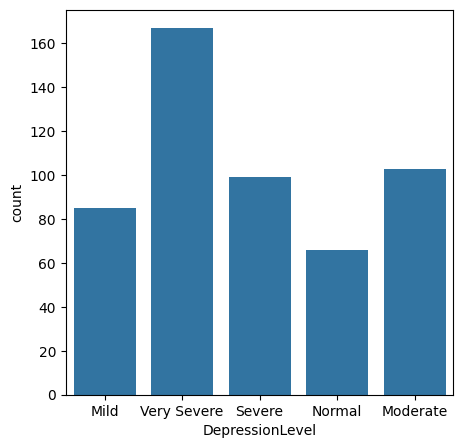

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 5))
sns.countplot(x = df_scale['DepressionLevel'] )
plt.show()

In [16]:
# # One-hot encoding for nominal catagorical valuse in demograpy dataframe
# df_demo_encoded = pd.get_dummies(df_demography)
# df_demo_encoded.head()

In [17]:
# #merging both demographic features and scale features
# df_merged = pd.merge(df_demo_encoded, df_scale, left_index=True, right_index=True)
# df_merged.head()

In [18]:
# df_merged.shape

In [19]:
# Assign features (X) and target variable (y) || y = f(x)
X = df_scale.drop('DepressionLevel', axis=1)  # Features (all columns except 'Target column')
y = df_scale['DepressionLevel']  # Target variable ('Target' column)

###**Train Test Split** (No Need to change anthing from here)

In [20]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

###**Feature Scalling**

In [21]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Define 8 different classifiers**

In [22]:
# Defining classifiers with best hyperparameters
classifiers = {
    'KNN': KNeighborsClassifier(metric='euclidean', n_neighbors=1),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', max_depth=17, min_samples_leaf=1, min_samples_split=2),
    'Random Forest': RandomForestClassifier(criterion='gini', max_depth=15, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=50),
    'Logistic Regression': LogisticRegression(C=100.0, solver='newton-cg'),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(C=10.0, degree=2, gamma=0.01, kernel='linear', probability=True),
    'AdaBoost': AdaBoostClassifier(algorithm='SAMME.R', learning_rate=1, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(learning_rate=1, loss='log_loss', max_depth=1, min_samples_leaf=1, min_samples_split=2, n_estimators=200)
}

### **Train and evaluate classifiers**

In [23]:
# Store evaluation metrics
evaluation_metrics = {name: {'accuracy': [], 'precision': [], 'recall': [], 'f1': []} for name in classifiers.keys()}

initial_random_state = 0

# Train and evaluate classifiers with different random_state values
for random_state in range(0, 100):
    # Split dataset into train and test sets with current random_state
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

    # Standardize the features
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Train and evaluate classifiers
    for name, clf in classifiers.items():
        # Train the classifier
        clf.fit(X_train, y_train)

        # Predict using the trained classifier
        y_pred = clf.predict(X_test)

        # Evaluate the classifier's performance
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Append evaluation metrics to the dictionary
        evaluation_metrics[name]['accuracy'].append(accuracy)
        evaluation_metrics[name]['precision'].append(precision)
        evaluation_metrics[name]['recall'].append(recall)
        evaluation_metrics[name]['f1'].append(f1)

# Print the evaluation metrics
for name, metrics in evaluation_metrics.items():
    print(f"-------------{name}:-------------")
    print(f"Mean Accuracy: {np.mean(metrics['accuracy']):.5f} ± {np.std(metrics['accuracy']):.5f}")
    print(f"Mean Precision: {np.mean(metrics['precision']):.5f} ± {np.std(metrics['precision']):.5f}")
    print(f"Mean Recall: {np.mean(metrics['recall']):.5f} ± {np.std(metrics['recall']):.5f}")
    print(f"Mean F1 Score: {np.mean(metrics['f1']):.5f} ± {np.std(metrics['f1']):.5f}")
    print()


-------------KNN:-------------
Mean Accuracy: 0.74577 ± 0.04249
Mean Precision: 0.72788 ± 0.04534
Mean Recall: 0.74596 ± 0.03905
Mean F1 Score: 0.72737 ± 0.04360

-------------Decision Tree:-------------
Mean Accuracy: 0.68971 ± 0.04524
Mean Precision: 0.68022 ± 0.04635
Mean Recall: 0.68820 ± 0.04529
Mean F1 Score: 0.67752 ± 0.04688

-------------Random Forest:-------------
Mean Accuracy: 0.74750 ± 0.04299
Mean Precision: 0.74068 ± 0.04435
Mean Recall: 0.74325 ± 0.04306
Mean F1 Score: 0.73496 ± 0.04358

-------------Logistic Regression:-------------
Mean Accuracy: 0.97279 ± 0.01971
Mean Precision: 0.97042 ± 0.02292
Mean Recall: 0.96960 ± 0.02221
Mean F1 Score: 0.96901 ± 0.02318

-------------Naive Bayes:-------------
Mean Accuracy: 0.68279 ± 0.04247
Mean Precision: 0.65107 ± 0.04889
Mean Recall: 0.67624 ± 0.04073
Mean F1 Score: 0.64555 ± 0.04569

-------------SVM:-------------
Mean Accuracy: 0.98317 ± 0.01479
Mean Precision: 0.97983 ± 0.01911
Mean Recall: 0.98074 ± 0.01693
Mean F1 Scor

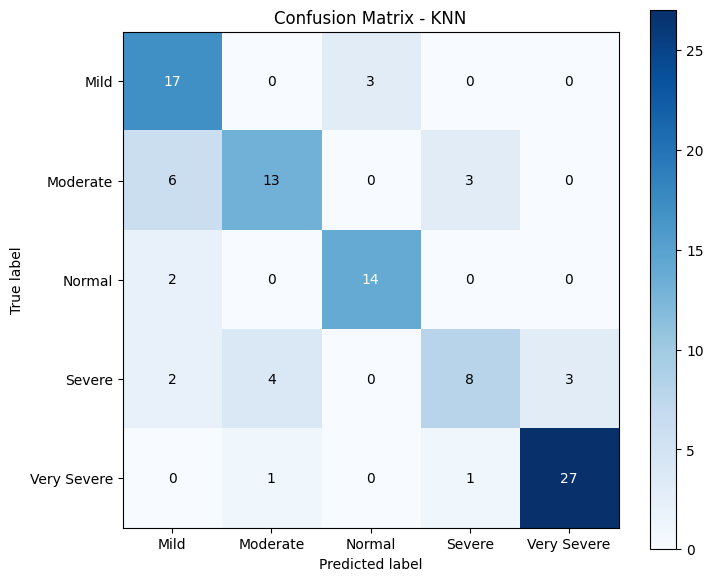

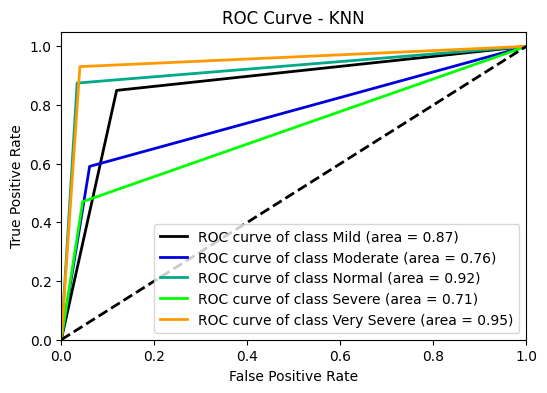

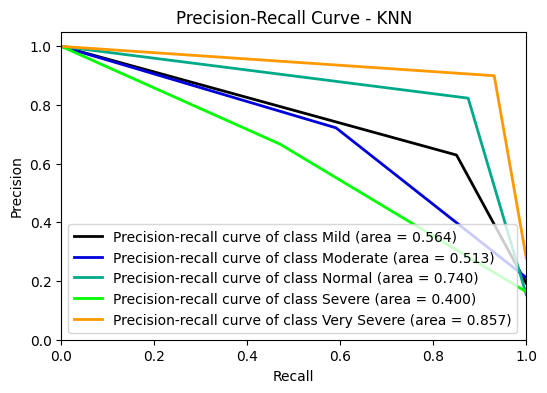

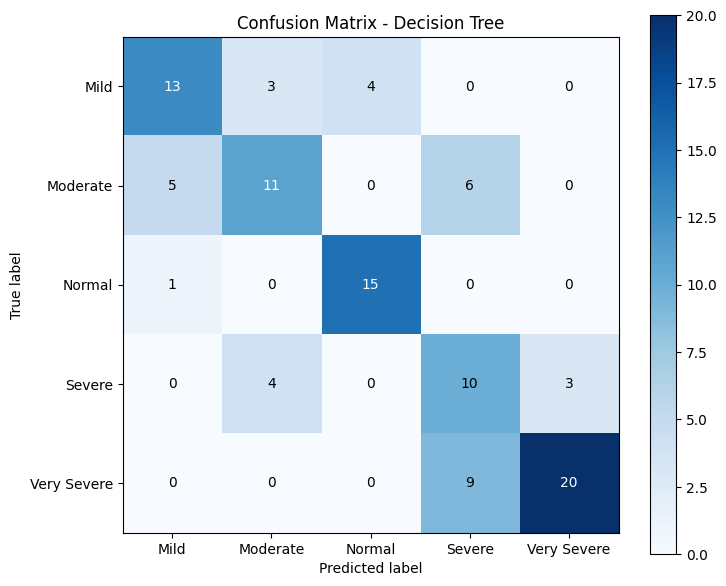

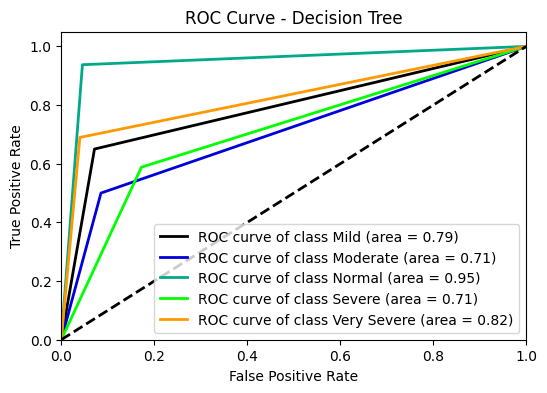

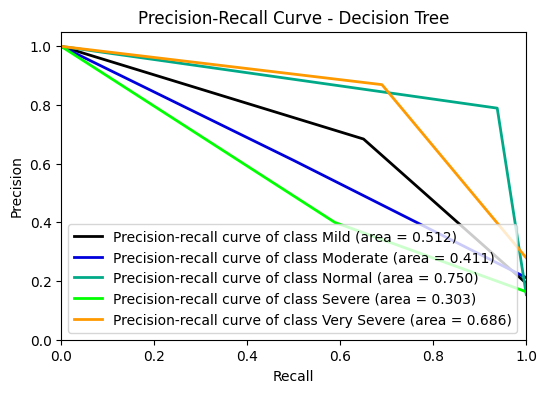

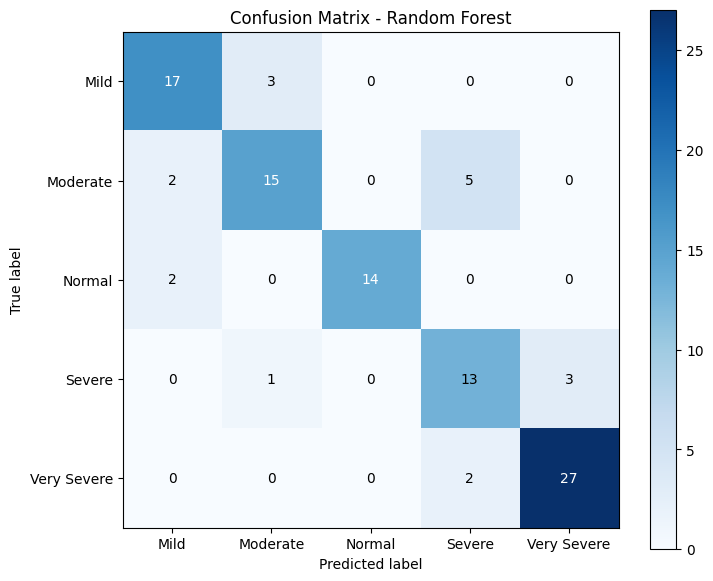

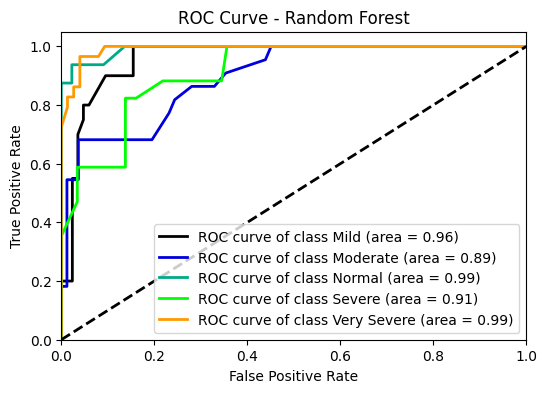

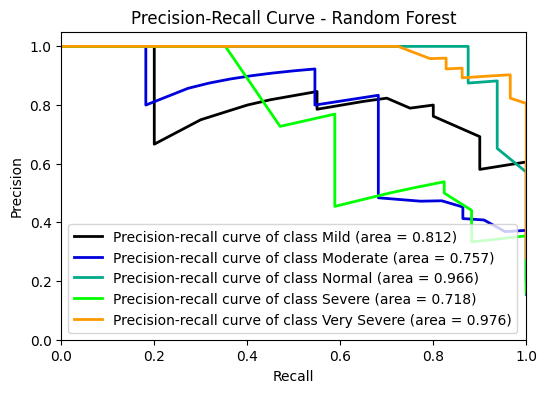

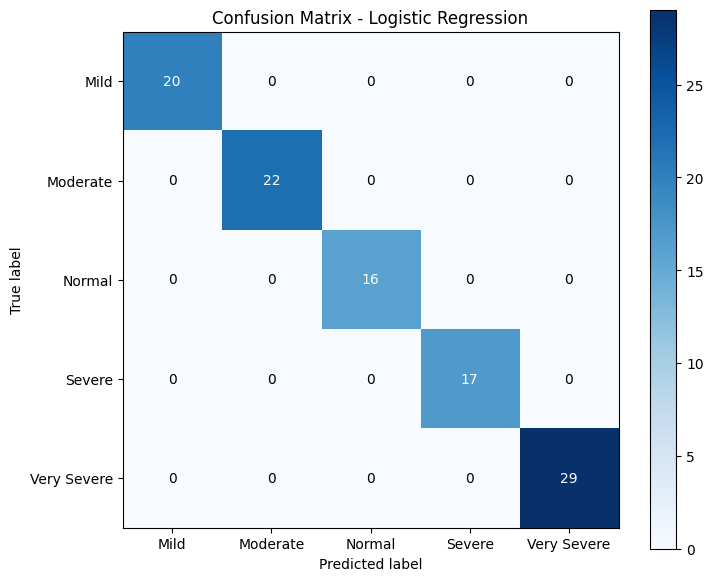

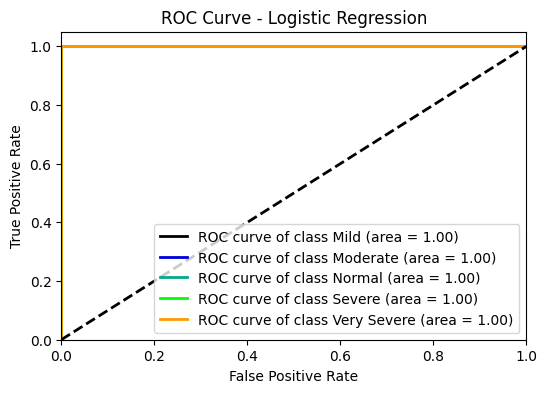

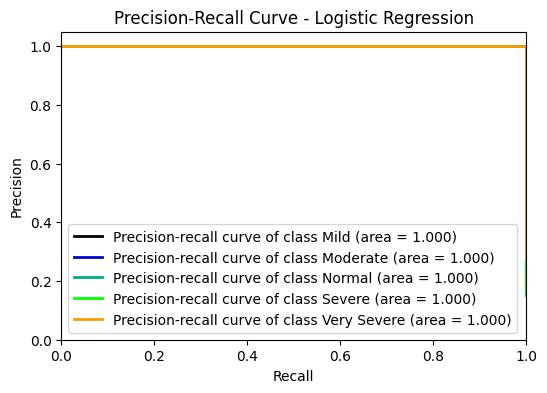

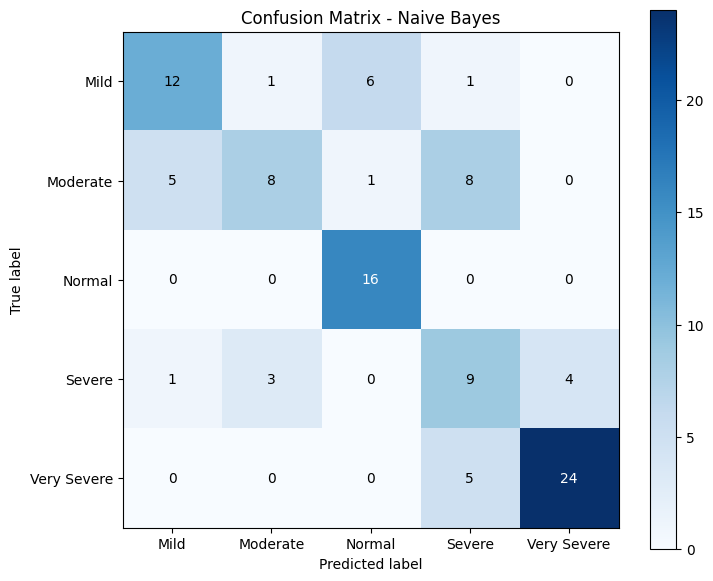

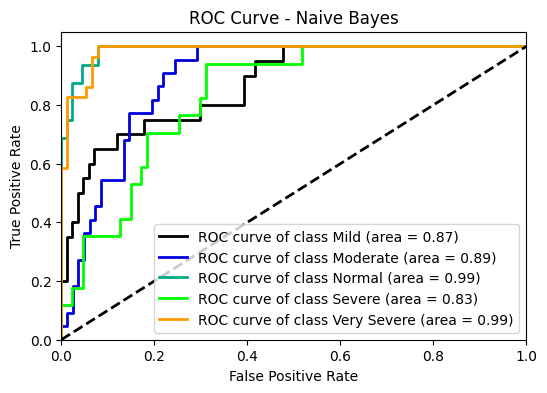

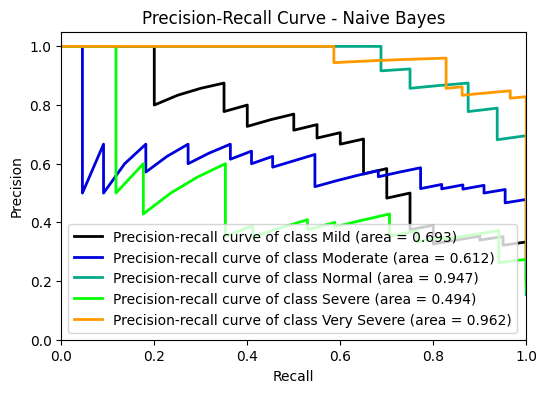

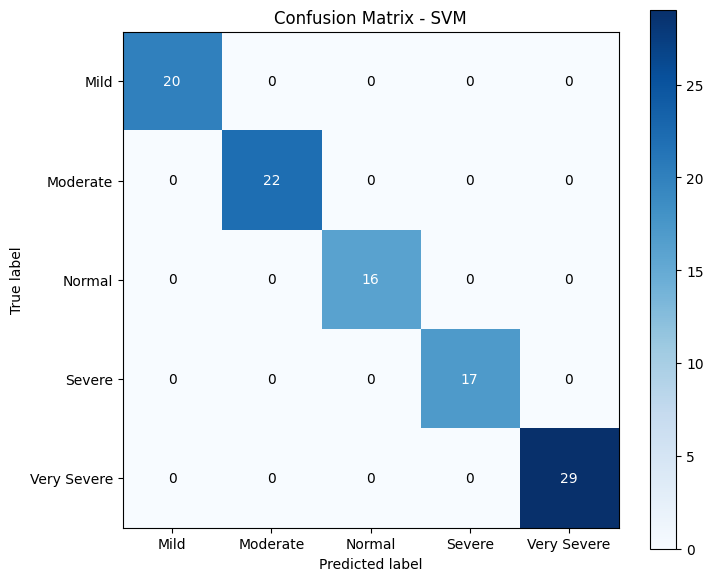

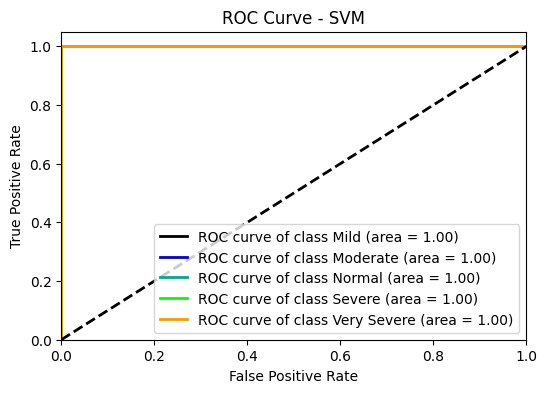

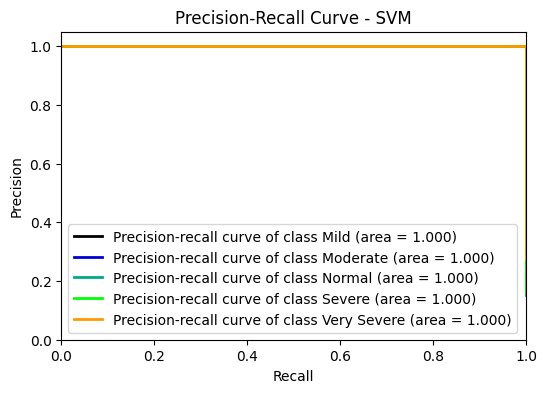

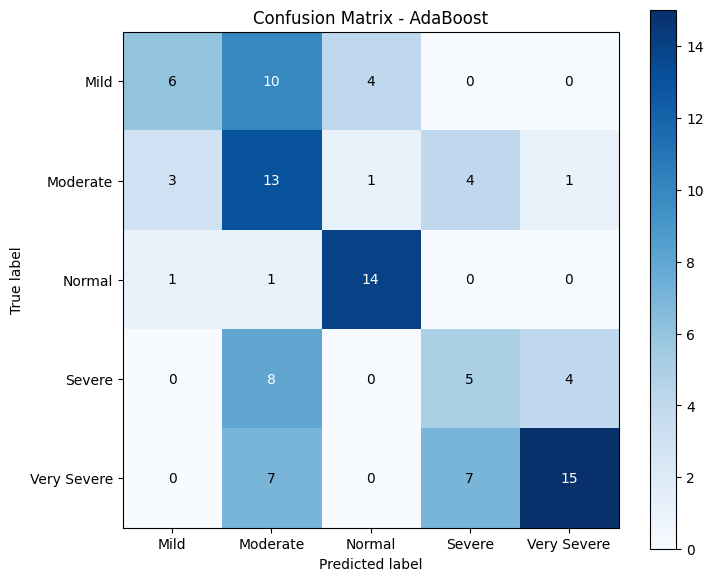

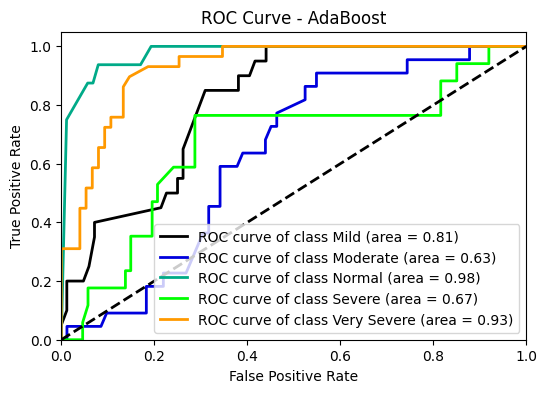

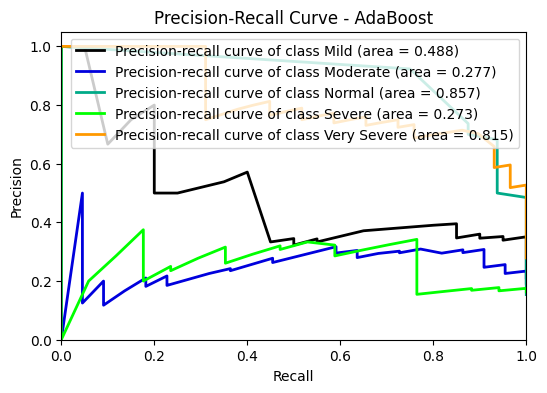

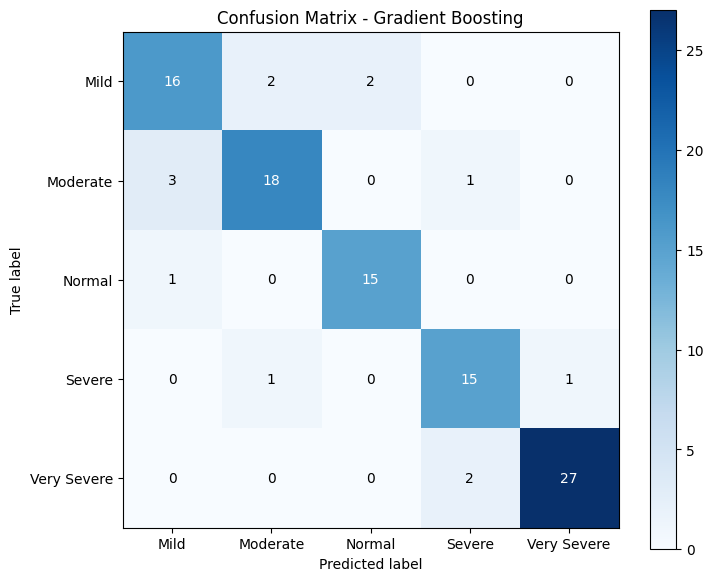

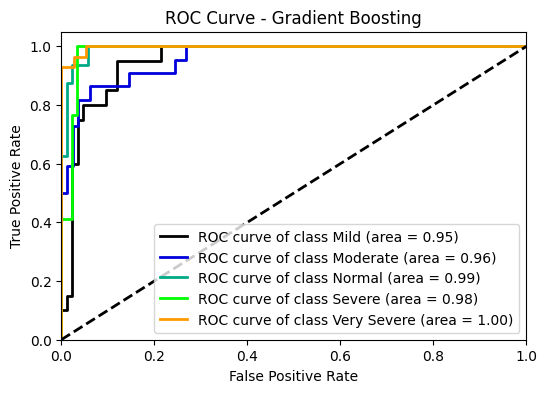

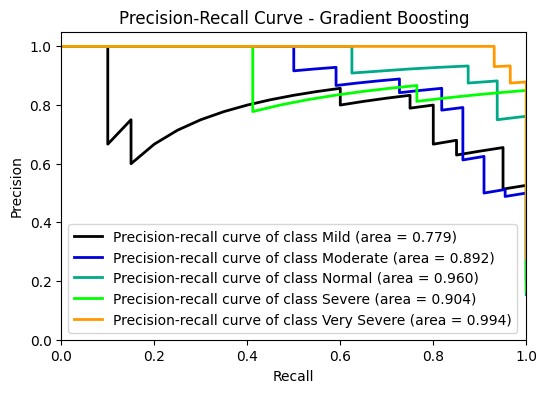

In [24]:
# Evaluating the final results
for name, clf in classifiers.items():
    # Train the best classifier
    clf.fit(X_train, y_train)

    # Predict using the trained classifier
    y_pred = clf.predict(X_test)


    # Plot confusion matrix with classifier name
    skplt.metrics.plot_confusion_matrix(y_test, y_pred, figsize=(8,7), title=f"Confusion Matrix - {name}")

    # Plot ROC curve with classifier name
    y_probas = clf.predict_proba(X_test)
    skplt.metrics.plot_roc(y_test, y_probas, figsize=(6, 4), plot_micro=False, plot_macro=False, title=f"ROC Curve - {name}")

    # Plot PRC curve with classifier name
    skplt.metrics.plot_precision_recall(y_test, y_probas, figsize=(6, 4), plot_micro=False, title=f"Precision-Recall Curve - {name}")

    print()

# Highlights -

Highest Accuracy -
SVM - 97% -> 96%
LR - 97% -> 97%